## Step 2: Exploratory Data Analysis

#### Name: Tian Lan

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

In [89]:
clean_df = pd.read_csv('clean_data.csv')

clean_df.sample(5)

,Video ID,User,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate,Number of Hashtags
21863,6890928091661733121,luckashyowa,[],Быстро,14,857,1,9,10100,474100,7400000,661,2020,11,3,2,Afternoon,867,0.001829,0
15884,6892180300282072322,soydanielvargas,['academiagli'],sonido original,46,971000,672,4422,3900000,9500000,460100000,1940,2020,11,7,6,Midnight,976094,0.102747,1
35222,6877325529708629249,annamcnulty,[],WOW,8,96100,239,674,529700,5200000,95900000,194,2020,9,28,1,Midnight,97013,0.018656,0
52636,6855714717592341766,sherinicolee,"['alexdileoyouthchallenge', 'foryou', 'Lookali...",Youth - Kane Cooper Remix,20,3100000,5005,14800,16600000,12100000,268500000,179,2020,7,31,5,Evening,3119805,0.257835,4
38752,6835831754880748801,fitness365days,[],original sound,23,3018,224,23,80100,1800000,15800000,606,2020,6,8,1,Midnight,3265,0.001814,0


In [90]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52844 entries, 0 to 52843
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            52844 non-null  int64  
 1   User                52844 non-null  object 
 2   Hashtags            52844 non-null  object 
 3   Song Title          52844 non-null  object 
 4   Video Length        52844 non-null  int64  
 5   Likes               52844 non-null  int64  
 6   Shares              52844 non-null  int64  
 7   Comments            52844 non-null  int64  
 8   Views               52844 non-null  int64  
 9   Followers           52844 non-null  int64  
 10  Total Likes         52844 non-null  int64  
 11  Total Videos        52844 non-null  int64  
 12  Upload Year         52844 non-null  int64  
 13  Upload Month        52844 non-null  int64  
 14  Upload Day          52844 non-null  int64  
 15  Upload Weekday      52844 non-null  int64  
 16  Uplo

#### Distribution of the Data

- Distribution of Engagement Features (Views, Likes, Comments, Shares)

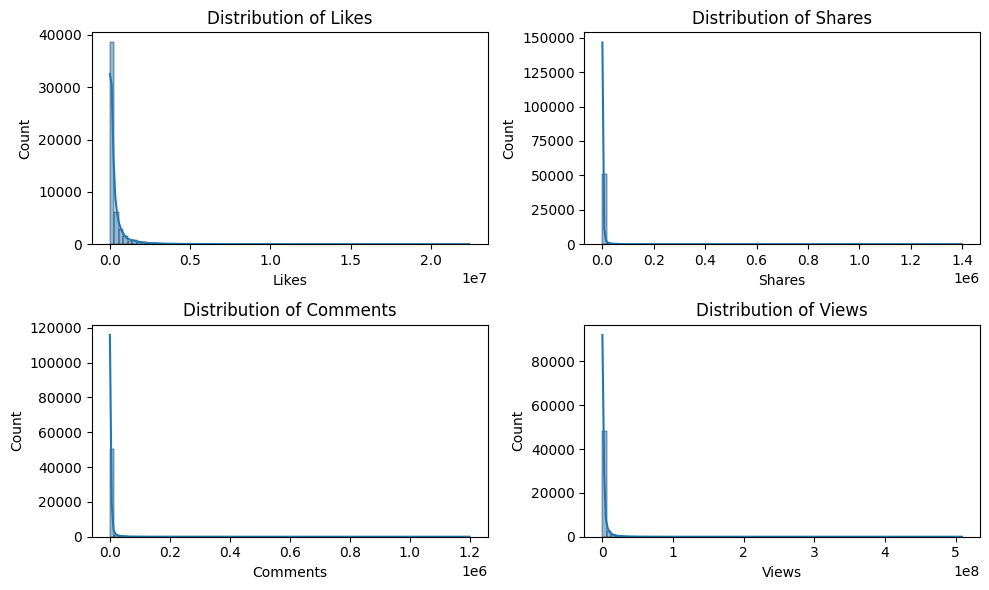

In [91]:
engagement_columns = ['Likes', 'Shares', 'Comments', 'Views']

plt.figure(figsize=(10, 6))

for i, col in enumerate(engagement_columns):
    plt.subplot(2, 2, i+1)
    sns.histplot(clean_df[col], bins=80, kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Upon analyzing the data, it becomes apparent that the features associated with engagement, such as views, likes, comments, and shares, exhibit a notable skewness, with a concentration of values within the lower range. This skewness indicates that a significant proportion of videos receive relatively lower levels of engagement, while a smaller subset achieves higher levels of engagement.

The observed deviation from a normal distribution raises the possibility of introducing bias in certain analyses or models that assume a normal distribution or an even distribution across the engagement range. The skewed nature of the data suggests that the majority of videos may not reach the same level of engagement as a select few viral or highly engaging videos.

- Distribution of Upload Time and the Period - provide insights into temporal patterns and trends

In [92]:
clean_df['Upload Year'].value_counts()

Upload Year
2020    52156
2019      562
2017       54
2018       37
2016       32
2015        3
Name: count, dtype: int64

Upon reviewing the upload year data within the dataset, it becomes apparent that the majority of the data points are concentrated in the year 2020. In order to analyze the temporal patterns more effectively, it is prudent to focus solely on the year 2020 and examine the distribution of time within that timeframe.

BTW, it is worth noting that TikTok was initially released in 2016 and gained widespread popularity, eventually becoming the top app to download in 2018. 

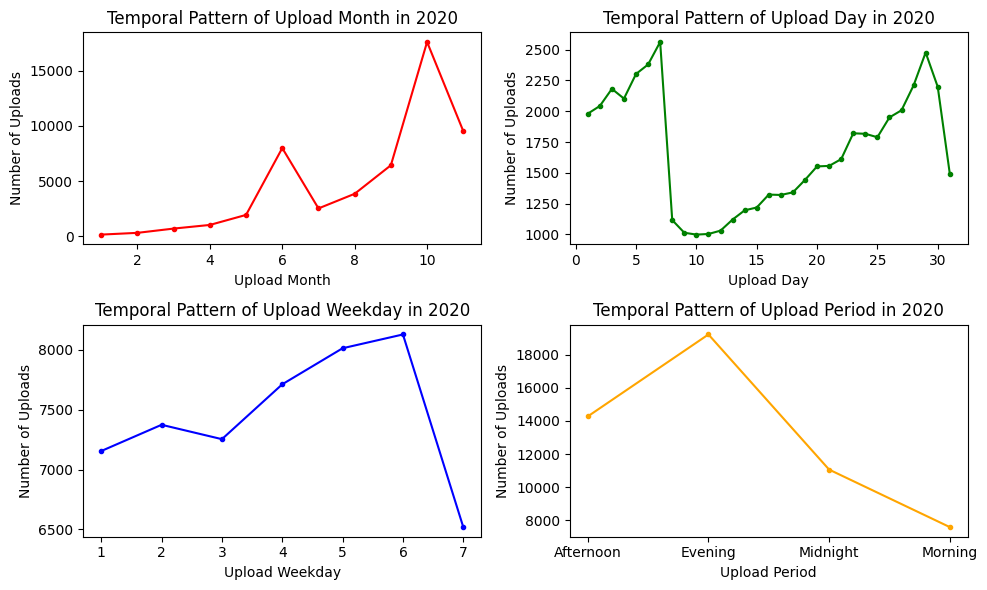

In [93]:
time_columns = ['Upload Month', 'Upload Day', 'Upload Weekday', 'Upload Period']
line_colors = ['red', 'green', 'blue', 'orange']

plt.figure(figsize=(10, 6))

for i, col in enumerate(time_columns):
    plt.subplot(2, 2, i+1)
    time_data = clean_df[clean_df['Upload Year'] == 2020].groupby(col).size()
    plt.plot(time_data.index, time_data.values, marker='.', color=line_colors[i])
    plt.xlabel(col)
    plt.ylabel('Number of Uploads')
    plt.title(f'Temporal Pattern of {col} in 2020')

plt.tight_layout()
plt.show()

Temporal Pattern of Upload Month: The analysis of the upload month reveals two prominent peaks within the year 2020, namely July and October. Interestingly, aside from these peak months, there is a gradual increase in the number of uploaded videos from January to December. This upward trend indicates a general growth in video uploads throughout the year, with the exception of the two peak months. Further investigation is required to understand the factors contributing to the specific surge in video uploads during July and October.

Temporal Pattern of Upload Day: The examination of upload days demonstrates a distinct pattern. Initially, there is a gradual increase in the number of uploaded videos during the early days of the month. However, a noticeable drop is observed, reaching its lowest point around the 10th of the month. Subsequently, the number of uploaded videos gradually rises until the latter part of the month, followed by a decline towards the end of the month. The reasons behind this observed pattern warrant further exploration and analysis.

Temporal Pattern of Upload Weekday: Analysis of the upload weekday pattern indicates a gradual increase in the number of video uploads from Monday to Saturday, with Saturday being the peak day for video uploads. However, a significant drop is observed when Sunday is reached. This trend suggests that TikTok users tend to engage in more video uploads during weekdays, peaking on Saturdays, but demonstrate reduced activity on Sundays.

Temporal Pattern of Upload Period: The analysis of the upload period reveals a preference for uploading videos in the evening, followed by the afternoon and midnight. Conversely, the morning time exhibits the lowest number of uploaded videos. This pattern suggests a temporal preference among users, with evening hours being more conducive to video creation and sharing. Further exploration can shed light on the reasons behind these temporal preferences and their potential impact on user engagement and video content.

- Distribution of Followers and Total Likes - gain a better understanding of the range and diversity of user profiles, including both influencers and regular users, within the dataset

In [94]:
user_df = clean_df[['User_ID', 'Followers', 'Total Likes', 'Total Videos']].drop_duplicates('User_ID')

user_df

KeyError: "['User_ID'] not in index"

In the context of TikTok, users who have amassed a follower count exceeding one million are commonly regarded as TikTok influencers. 

In [ ]:
plt.figure(figsize=(10,8))

sns.displot(user_df, x='Followers', bins=50, kde=True)
plt.title('Distribution of Users')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')

plt.show()

In [ ]:
# focus on the users with less than 1 million followers

plt.figure(figsize=(10,8))

sns.displot(user_df[user_df['Followers'] < 1000000], x='Followers', bins=50, kde=True)
plt.title('Distribution of Users under 1 Million Followers')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Users')

plt.show()

Based on the histogram above, it is evident that the dataset encompasses records for both regular users and influencers. However, a notable imbalance exists within the dataset, with a significant concentration of data points pertaining to regular users. This disparity poses potential challenges in training a model that performs equally well for both regular users and influencers. The skewed distribution of data in favor of regular users implies that the model may exhibit a bias towards this majority class during training. As a consequence, its ability to effectively capture the unique characteristics and patterns exhibited by influencers could be compromised.

#### Grouping data with duplicated meaning

After examination of the dataset, it has been discovered that the "Song Title" column contains values indicating the absence of background music in the videos. These values are expressed in multiple languages, suggesting that they all signify the usage of the original sound in the videos. To ensure consistency and facilitate analysis, I will standardize these values by replacing all language variants with the term "original sound." By treating these entries as a unified group, further analysis can be conducted to explore the characteristics and patterns associated with videos that utilize the original sound.

In [95]:
clean_df['Song Title'].value_counts()

Song Title
original sound                      23934
sonido original                      3091
оригинальный звук                     843
som original                          731
Originalton                           336
                                    ...  
Try to get up                           1
LEAD THE RACE (UNDEFEATED)              1
THOT!                                   1
Blow Ya Mind - Club Caviar Remix        1
everybody wants you sept 10th           1
Name: count, Length: 7654, dtype: int64

In [96]:
song_title_ori = clean_df[clean_df['Song Title'].str.contains('ori', case=False)]['Song Title'].value_counts()

song_title_ori

Song Title
original sound                                                       23934
sonido original                                                       3091
som original                                                           731
Originalton                                                            336
Original Sound                                                         207
                                                                     ...  
original sound - ❤ S A M I R A H ❤                                       1
original sound - PRAYAS❤️                                                1
original sound - xoremchentamang                                         1
original sound - Khatri_17                                               1
Ironic (Originally Performed by Alanis Morissette) [Instrumental]        1
Name: count, Length: 1021, dtype: int64

In [97]:
# only display the song title contain 'ori' that occur more than 10 times

song_title_ori[song_title_ori > 10].reset_index()

,Song Title,count
0,original sound,23934
1,sonido original,3091
2,som original,731
3,Originalton,336
4,Original Sound,207
5,orijinal ses,190
6,son original,176
7,suono originale,66
8,Hit the Quan (Original Version),62
9,origineel geluid,55


In [98]:
# Original Sound in Multiple Languages
# Song Titles Starting with "Original Sound - Username" representing 
# the song is originally created by the user indicated in the username

orig_sounds = ['original sound', 'sonido original', 'som original', 
               'Originalton', 'Original Sound', 'orijinal ses', 
               'son original', 'оригинальный звук', 'suono originale', 
               'origineel geluid']

In [99]:
clean_df['Song Title'] = clean_df['Song Title'].replace(orig_sounds, 'original sound')

In [100]:
clean_df['Song Title'].value_counts()

Song Title
original sound                      29629
الصوت الأصلي                          316
Monkeys Spinning Monkeys              131
What You Know Bout Love               124
WAP（feat. Megan Thee Stallion）        123
                                    ...  
Try to get up                           1
LEAD THE RACE (UNDEFEATED)              1
THOT!                                   1
Blow Ya Mind - Club Caviar Remix        1
everybody wants you sept 10th           1
Name: count, Length: 7645, dtype: int64

Based on the observation, it is evident that the utilization of the original sound in video recordings constitutes more than half of the available video data. This finding suggests that the non-background music (non-BGM) type of TikTok videos holds significance within the dataset. It is important to note that this category may encompass various scenarios, including videos where users choose to use another device to play background music or videos where the usage of background audio is not explicitly indicated or marked.

#### Exploring Song Titles

Based on the observations made, it is evident that the term 'original sound' frequently appears in the dataset, predominantly due to its association with the group of videos that do not include background music. To further analyze the relationship between songs and engagement, it is essential to remove the 'original sound' value from the dataset and focus on the remaining song titles.

In [101]:
song_df = clean_df[clean_df['Song Title'] != 'original sound']

song_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23215 entries, 0 to 52842
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            23215 non-null  int64  
 1   User                23215 non-null  object 
 2   Hashtags            23215 non-null  object 
 3   Song Title          23215 non-null  object 
 4   Video Length        23215 non-null  int64  
 5   Likes               23215 non-null  int64  
 6   Shares              23215 non-null  int64  
 7   Comments            23215 non-null  int64  
 8   Views               23215 non-null  int64  
 9   Followers           23215 non-null  int64  
 10  Total Likes         23215 non-null  int64  
 11  Total Videos        23215 non-null  int64  
 12  Upload Year         23215 non-null  int64  
 13  Upload Month        23215 non-null  int64  
 14  Upload Day          23215 non-null  int64  
 15  Upload Weekday      23215 non-null  int64  
 16  Upload Pe

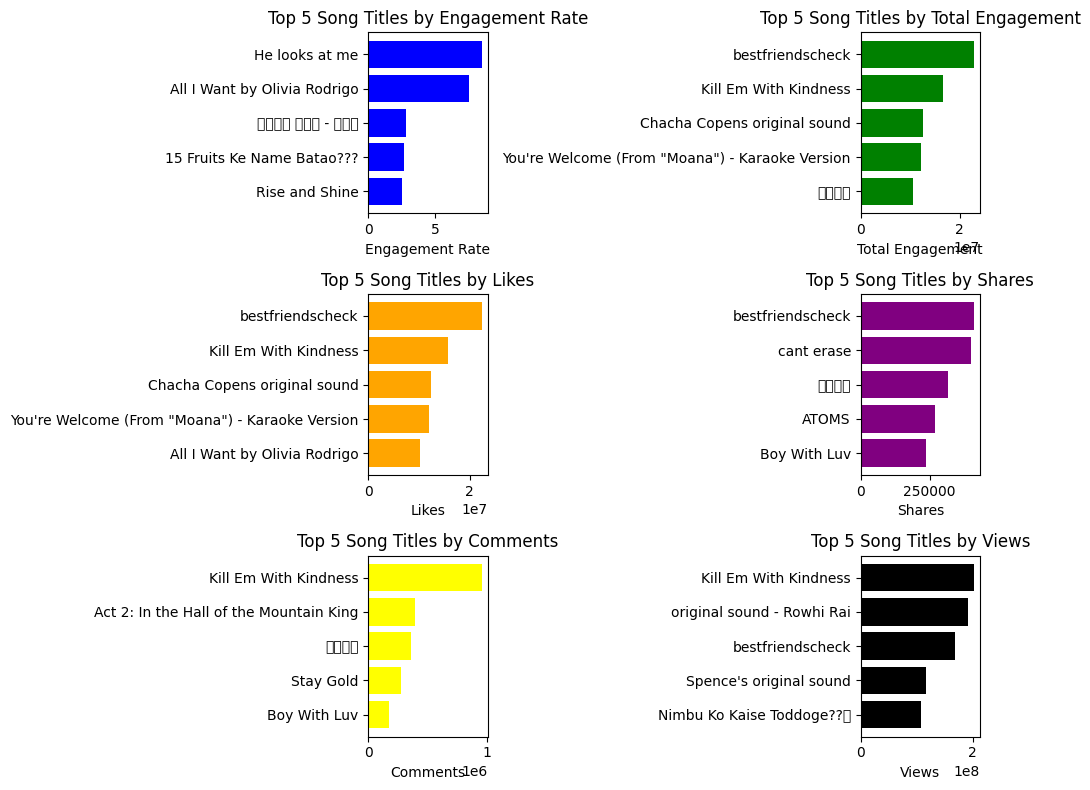

In [102]:
engagement_features = ['Engagement Rate', 'Total Engagement', 'Likes', 'Shares', 'Comments', 'Views']
colors = ['blue', 'green', 'orange', 'purple', 'yellow', 'black']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10,8))
fig.subplots_adjust(hspace=0.4)

for i, feature in enumerate(engagement_features):
    
    song_group = song_df.groupby('Song Title')[feature].mean()
    top_songs = song_group.nlargest(5).sort_values()
    
    row = i // 2
    col = i % 2
    
    axes[row, col].barh(top_songs.index, top_songs.values, color=colors[i])
    axes[row, col].set_xlabel(feature)
    #axes[row, col].set_ylabel('Song Title')
    axes[row, col].set_title(f'Top 5 Song Titles by {feature}')

plt.tight_layout()
plt.show()

In [103]:
# special characters, such as Korean characters, are not displaying correctly in the plots

sorted_engagement = song_df.groupby('Song Title')['Engagement Rate'].mean().sort_values(ascending=False)

sorted_engagement.head(5)

Song Title
He looks at me                  8.479699
All I Want by Olivia Rodrigo    7.500071
오리지널 사운드 - 차서준                  2.796493
15 Fruits Ke Name Batao???      2.647083
Rise and Shine                  2.513101
Name: Engagement Rate, dtype: float64

Based on the insights derived from the above bar chart, it is interesting to observe that certain songs appear multiple times in the dataset. Notably, some songs exhibit a strong presence in the "Total Engagement" ranking, indicating their popularity based on cumulative engagement metrics such as likes, shares, comments, and views. However, these same songs may not feature prominently in the "Engagement Rate" ranking, suggesting that the number of followers has a significant influence on the overall engagement rate.

Furthermore, it is important to note that not all the songs identified in the analysis are specific to the timeframe of data collection, which spans 2020 and 2021. Some songs may be classified as classic music or popular during certain holiday seasons. This indicates that the TikTok community's preferences extend beyond the contemporary hit songs and encompasses a broader range of musical genres and time periods.

The relationship between a song's popularity on TikTok and its status as a hit song outside the platform is complex and challenging to ascertain definitively. It is possible that songs gain popularity on TikTok and subsequently become hit songs, or vice versa, where already popular songs find their way onto the TikTok platform and further enhance their reach and popularity. The interplay between TikTok trends and mainstream music trends contributes to the dynamic nature of song popularity on the platform.

#### Exploring Upload Time

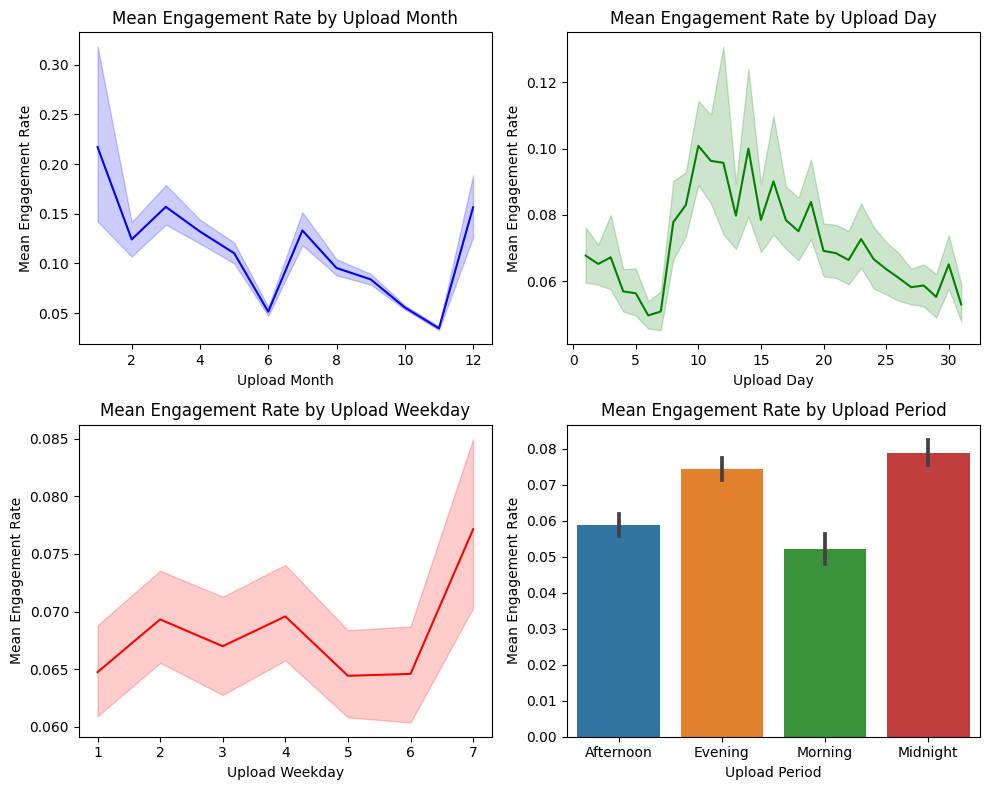

In [104]:
time_features = ['Upload Month', 'Upload Day', 'Upload Weekday']
colors = ['blue', 'green', 'red']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.subplots_adjust(hspace=0.4)

# line plot for continuous data
for i, feature in enumerate(time_features):
    ax = axes[i // 2, i % 2]
    sns.lineplot(data=clean_df, x=feature, y='Engagement Rate', estimator=np.mean, color=colors[i], ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel('Mean Engagement Rate')
    ax.set_title(f'Mean Engagement Rate by {feature}')

# bar plot for non-continuous data
sns.barplot(data=clean_df, x='Upload Period', y='Engagement Rate', estimator=np.mean, ax=axes[1, 1])
axes[1, 1].set_xlabel('Upload Period')
axes[1, 1].set_ylabel('Mean Engagement Rate')
axes[1, 1].set_title('Mean Engagement Rate by Upload Period')

plt.savefig('Engagement Rate by Upload Period.png')

plt.tight_layout()
plt.show()

The analysis reveals intriguing insights regarding the influence of upload time on the average engagement rate of videos. Key findings include:

1. Impact of Upload Month: June and November exhibit the lowest engagement rates, while January stands out with the highest engagement rate. This suggests that videos uploaded in January tend to receive a higher level of user engagement compared to those uploaded in June or November.

2. Effect of Upload Day within the Month: The middle days of the month demonstrate higher engagement rates compared to the early or late days. This indicates that videos uploaded during the middle period of the month are more likely to attract user engagement and interaction.

3. Engagement Rate by Weekday: Surprisingly, Sunday records the highest engagement rate, whereas Friday and Saturday have the lowest engagement rates. This finding is intriguing as Sunday has the fewest video uploads, yet users appear to be more inclined to interact and watch videos on this particular day. Conversely, although users tend to post videos on Saturdays, these videos tend to have lower engagement rates.

4. Influence of Upload Period: The analysis indicates that videos uploaded during midnight hours observe the highest engagement rate, followed by the evening, afternoon, and morning periods. This aligns with expectations, as users typically have more leisure time to watch videos in the evening and night, compared to the morning and afternoon when they may be engaged in other activities.

#### Exploring Number of Hashtags

<Figure size 1000x800 with 0 Axes>

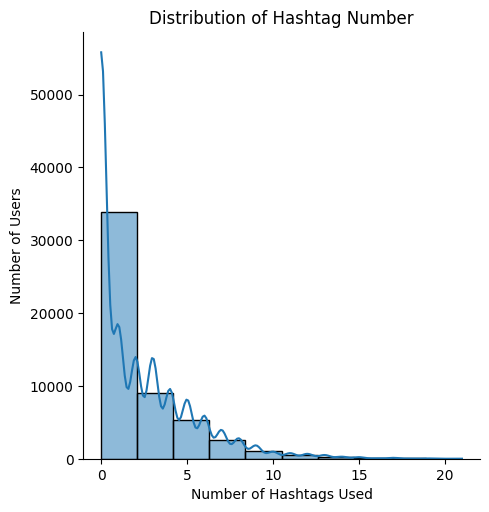

In [105]:
plt.figure(figsize=(10,8))

sns.displot(clean_df, x='Number of Hashtags', bins=10, kde=True)
plt.title('Distribution of Hashtag Number')
plt.xlabel('Number of Hashtags Used')
plt.ylabel('Number of Users')

plt.show()

Based on the analysis, it is evident that the distribution of the number of hashtags used in the videos is heavily skewed and concentrated towards lower values. The majority of videos tend to utilize fewer than 10 hashtags, with a significant portion using less than 5 hashtags.

This skewed distribution highlights a common trend among TikTok users, where a substantial proportion of videos rely on a limited number of hashtags to categorize or tag their content. This observation suggests that users may opt for a more targeted approach in selecting hashtags that are most relevant to their video's content or intended audience.

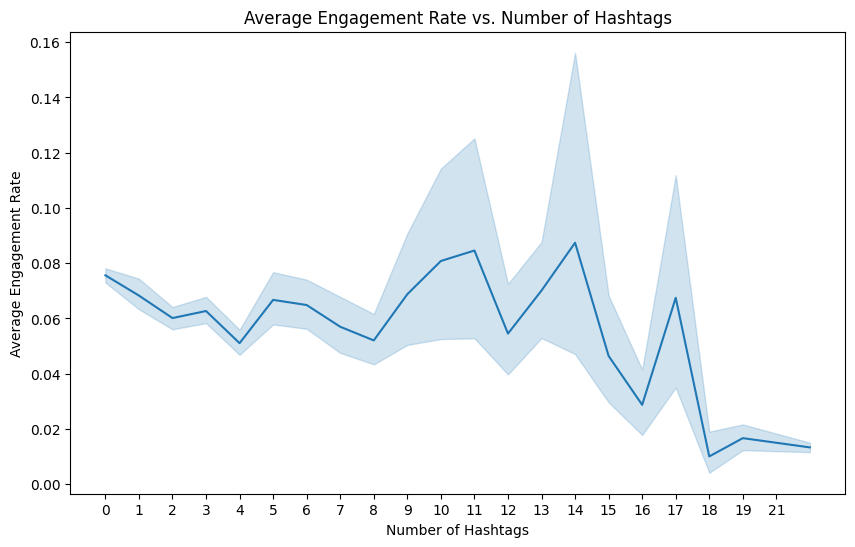

In [106]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=clean_df, x='Number of Hashtags', y='Engagement Rate', estimator=np.mean)

plt.xlabel('Number of Hashtags')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate vs. Number of Hashtags')

unique_hashtags = sorted(clean_df['Number of Hashtags'].unique())
plt.xticks(range(len(unique_hashtags)), unique_hashtags)

plt.savefig('Average Engagement Rate vs. Number of Hashtags.png')

plt.show()

In [107]:
mean_engagement = clean_df.groupby('Number of Hashtags')['Engagement Rate'].mean().reset_index()

highest_avg_engagement = mean_engagement['Engagement Rate'].max()
highest_avg_hashtags = mean_engagement.loc[mean_engagement['Engagement Rate'] == highest_avg_engagement, 'Number of Hashtags'].values

print(f'When number of hashtags equals to {highest_avg_hashtags}, the video will receive the highest engagement rate on average.')

When number of hashtags equals to [14], the video will receive the highest engagement rate on average.


Based on the analysis of the line chart, it is important to consider the background information that there are no limits to the number of hashtags users can use on TikTok. However, it is crucial to ensure that the chosen number of hashtags is appropriate, given the character limit for captions, which is 300 characters (equivalent to approximately 40-80 words). With this in mind, the range of hashtags used in the analysis is likely to fall between 0 and 20.

Here are some insights derived from the line chart:

1. Optimal Hashtag Usage: The line chart reveals that videos with 14 hashtags tend to receive the highest engagement rate, followed by videos with 11 and 10 hashtags. This suggests that there is an optimal range for hashtag usage, beyond which the engagement rate does not show significant improvement. It is essential for content creators to consider this observation when crafting their hashtag strategy.

2. Engagement Rate and Hashtag Quantity: Interestingly, the engagement rate does not consistently increase with an increasing number of hashtags. Videos without any hashtags can still achieve a high engagement rate. This finding suggests that while hashtags can enhance discoverability and attract a targeted audience, TikTok's algorithm may have mechanisms to ensure that videos without hashtags still have the opportunity to be spread and interacted with by users.

3. Benefits for Content Creators: For content creators, the number of hashtags can be beneficial in optimizing video engagement. By selecting the appropriate number of hashtags within the optimal range, creators can increase the likelihood of their videos being discovered by users interested in similar topics or searching for specific hashtags. Strategic hashtag usage can contribute to higher engagement and broader reach for content creators.

4. Engagement Potential for Regular Users: Even for regular users who record videos spontaneously to capture moments from their daily lives, there is still a high possibility for their videos to be spread out and interacted with by others. This indicates that engagement on TikTok extends beyond hashtag usage and can be driven by the compelling nature of the content itself, irrespective of the number of hashtags utilized.

#### Exploring Hashtag Text

In [108]:
clean_df['Hashtags'].sample(5)

40205    ['larrywheels', 'motivation', 'bodybuilding', ...
13839                                                   []
7581     ['princeferran', 'xyzbca', 'lol', 'comedy', 'f...
14258    ['WatchonDisneyChannel', 'MoreThanAMystery', '...
9785            ['foryou', 'foryoupage', 'faryal_fairyyy']
Name: Hashtags, dtype: object

In [109]:
hashtags_list = clean_df['Hashtags'].tolist()

hashtags_list

["['johncena', 'love', 'tiktok', 'fyp', 'foryoupage', 'vibes']",
 "['johncena', 'love', 'tiktok', 'halloween', 'queen', 'roblox', 'bts', 'comedy']",
 "['johncena', 'love', 'fyp', 'foryoupage']",
 "['johncena', 'fyp', 'foryoupage', 'viral', 'comedy', 'charlidamelio', 'i']",
 "['johncena', 'foryoupage', 'fyp', 'viral']",
 "['johncena', 'foryoupage', 'fyp', 'viral', 'comedy', 'vibes']",
 "['johncena', 'foryoupage', 'fyp', 'viral', 'comedy']",
 "['foryoupage', 'fyp', 'johncena', 'viral']",
 "['foryoupage', 'fyp', 'wwe', 'johncena', 'viral', '🖐🏻']",
 "['foryoupage', 'fyp', 'johncena']",
 "['foryoupage', 'fyp', '🖐🏻']",
 "['johncena', 'foryoupage', 'fyp', 'viral']",
 "['johncena', 'fyp', 'foryoupage', 'wwe']",
 "['😂😂😂', 'xbox', 'johncena', 'fyp', 'viral', 'foryoupage', 'wwe']",
 "['johncena', 'fyp', 'foryoupage', 'viral', 'wwe']",
 "['johncena']",
 "['johncena', 'fyp', 'foryoupage', 'viral']",
 "['johncena', 'fyp', 'foryoupage', 'wwe', 'comedy', 'john_cena', 'viral']",
 "['johncena', 'fyp', '

In [110]:
vectorizer = CountVectorizer(min_df=5) #the hashtag must appear in at least five distinct videos

hashtag_vectors = vectorizer.fit_transform(hashtags_list)

feature_names = vectorizer.get_feature_names_out()

hashtags_df = pd.DataFrame(hashtag_vectors.toarray(), columns=feature_names)

combined_df = pd.concat([clean_df, hashtags_df], axis=1)

combined_df.sample(5)

,Video ID,User,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,...,킴스켄넬,타임스캔,틱톡미식회,틱톡밈,틱톡뷰티,틱톡푸드,포매라니안,포메,포메리안,할로윈
23015,6890639921959292162,itpayton_moormeier,[],original sound,21,104,3,1,441,8677,...,0,0,0,0,0,0,0,0,0,0
36069,6881341910137474309,thebentistgaming,"['callofduty', 'warzone', 'warzoneclips', 'gul...",Blue Blood,45,56500,32,199,245800,1200000,...,0,0,0,0,0,0,0,0,0,0
7557,6885170644187745542,dobre.world21,"['tempo', 'nohate', 'stinakayy', 'queen']",original sound,9,274,1,32,1779,33700,...,0,0,0,0,0,0,0,0,0,0
26593,6855407102953835782,traviesotiktok,"['ForYou', 'ForYouPage']",Love Story,13,243300,934,2282,1700000,2100000,...,0,0,0,0,0,0,0,0,0,0
20855,6885444388365815042,drcody_dc,"['crack', 'drcody', 'asmr', 'foryou', 'chiropr...",original sound,15,22300,319,108,339100,2500000,...,0,0,0,0,0,0,0,0,0,0


In [111]:
hashtag_counts = hashtag_vectors.sum(axis=0)

df_counts = pd.DataFrame(hashtag_counts, columns=feature_names)

df_counts = df_counts.T

df_counts.columns = ['Hashtag counts']

df_counts

,Hashtag counts
100klike,19
100klikes,6
100ways,7
101mishuu99,10
101public,47
...,...
틱톡푸드,25
포매라니안,8
포메,17
포메리안,14


In [112]:
sorted_counts = df_counts.sort_values(by='Hashtag counts', ascending=False)

sorted_counts

,Hashtag counts
fyp,7961
foryou,7508
foryoupage,4373
viral,1815
tiktok,1726
...,...
princess,5
nfl2020,5
tiktok_inida,5
kabul,5


In [113]:
top_20_hashtags = sorted_counts.head(20)

top_20_hashtags

,Hashtag counts
fyp,7961
foryou,7508
foryoupage,4373
viral,1815
tiktok,1726
trending,1665
duet,1548
comedy,1113
funny,937
tiktokindia,926


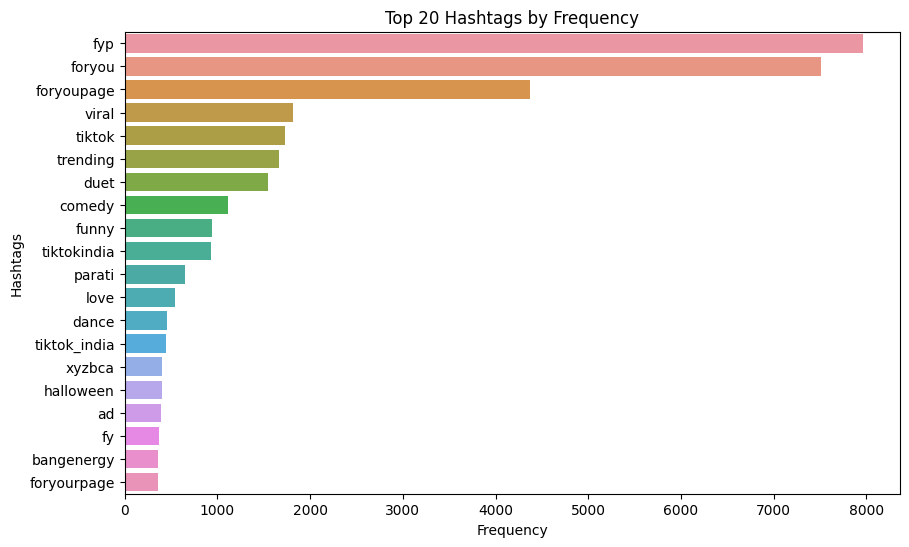

In [114]:
plt.figure(figsize=(10, 6))

sns.barplot(x=top_20_hashtags['Hashtag counts'], y=top_20_hashtags.index)

plt.xlabel('Frequency')
plt.ylabel('Hashtags')
plt.title('Top 20 Hashtags by Frequency')

plt.savefig('Top 20 Hashtags by Frequency.png')

plt.show()

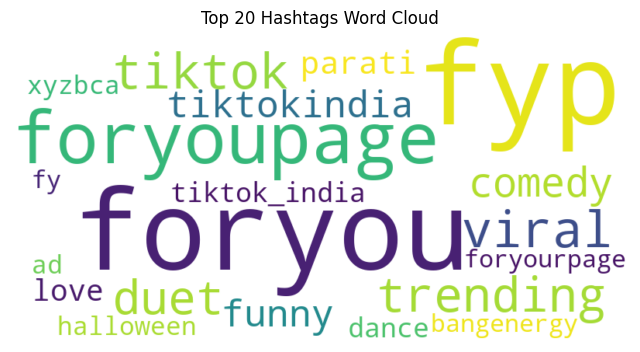

In [115]:
hashtags_dict = top_20_hashtags.set_index(top_20_hashtags.index)['Hashtag counts'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')\
            .generate_from_frequencies(hashtags_dict)

plt.figure(figsize=(8, 6))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 20 Hashtags Word Cloud')

plt.savefig('Top 20 Hashtags Word Cloud.png')

plt.show()

The analysis of the top 20 hashtags used in the collected dataset provides valuable insights into the prevalent trends and motivations behind hashtag usage on TikTok.

Among the top hashtags, it is evident that #fyp and #foryou dominate the rankings and appear most frequently. Interestingly, within this list, there are other variations and words that convey similar meanings to #fyp, such as #foryoupage, #foryourpage, #fy, #parati (Spanish for 'for you'), #tiktok, and #viral. It is worth noting that the hashtag #xyzabc serves a similar purpose as #fyp, a popular hashtag that users employ in hopes of gaining more views on their TikTok videos. Users often incorporate #fyp or #foryoupage in their videos to attract attention, likely due to the prominence of the TikTok "For You" page, which recommends videos tailored to individual user preferences. However, TikTok has not officially confirmed whether the use of these hashtags actually increases views or interactions. Experimentation with these hashtags has yielded mixed results, with some users reporting no significant benefits. Nevertheless, individuals may employ these hashtags simply because they have observed other content creators using them.

Certain hashtags, such as 'tiktokindia' and 'tiktok_india,' demonstrate a clear geographic association, indicating the active presence of Indian users on TikTok. It was reported that Indian users have taken the lead and emerged as frontrunners on the platform, contributing to the widespread usage of these specific hashtags.

Hashtags like #trending, #duet, #dance, #comedy, #funny, #halloween, and #love represent categories of videos, targeting audiences with specific interests and capturing their attention through content related to these areas.

In addition, hashtags like #ad and #bangenergy indicate the presence of advertisements within TikTok. For instance, the brand Bang Energy sponsors numerous TikTokers to create videos featuring their products or logo, accompanied by the hashtag #bangenergy. However, Bang Energy has encountered legal issues related to copyright infringement and music use nowadays, which has contributed to its financial struggles and impending bankruptcy.

The analysis of these top hashtags provides valuable insights into the motivations behind their usage, including the desire for attention, geographic associations, category targeting, and the presence of sponsored content. Understanding these patterns can inform content creators, marketers, and platform users about prevailing trends and practices on TikTok, enabling them to strategically leverage hashtags to maximize engagement and reach their desired audience.

#### Exploring Video Length

In [116]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52844 entries, 0 to 52843
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            52844 non-null  int64  
 1   User                52844 non-null  object 
 2   Hashtags            52844 non-null  object 
 3   Song Title          52844 non-null  object 
 4   Video Length        52844 non-null  int64  
 5   Likes               52844 non-null  int64  
 6   Shares              52844 non-null  int64  
 7   Comments            52844 non-null  int64  
 8   Views               52844 non-null  int64  
 9   Followers           52844 non-null  int64  
 10  Total Likes         52844 non-null  int64  
 11  Total Videos        52844 non-null  int64  
 12  Upload Year         52844 non-null  int64  
 13  Upload Month        52844 non-null  int64  
 14  Upload Day          52844 non-null  int64  
 15  Upload Weekday      52844 non-null  int64  
 16  Uplo

<Figure size 1000x800 with 0 Axes>

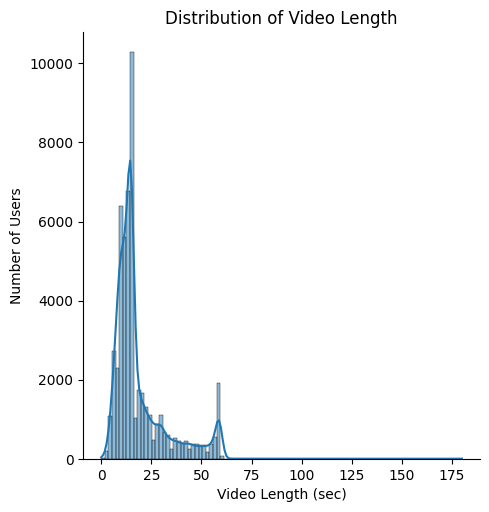

In [117]:
plt.figure(figsize=(10,8))

sns.displot(clean_df, x='Video Length', bins=100, kde=True)
plt.title('Distribution of Video Length')
plt.xlabel('Video Length (sec)')
plt.ylabel('Number of Users')

plt.show()

The analysis of the distribution of video length reveals that TikTok users predominantly upload videos of shorter durations, with a strong concentration observed within the range of 10 to 30 seconds. This aligns with the nature of TikTok's short-form video format and the platform's emphasis on concise and fast-paced content. Although TikTok allows videos up to 10 minutes in length,  the findings indicate that the majority of users adhere to the convention of creating and consuming videos within a 1-minute timeframe. 

To provide a more focused visualization of the changes in engagement rate, I applied a filter to include only videos with a duration of less than 60 seconds. This filter captures the majority of videos in the dataset, accounting for approximately 99.8% of the total videos. By narrowing the analysis to this subset of videos, we can gain a clearer understanding of the relationship between video length and engagement rate within the predominant range of durations observed on the platform.

In [118]:
short_video_df = clean_df[clean_df['Video Length'] < 60]

short_video_df.shape[0] / clean_df.shape[0]

0.9976913178411929

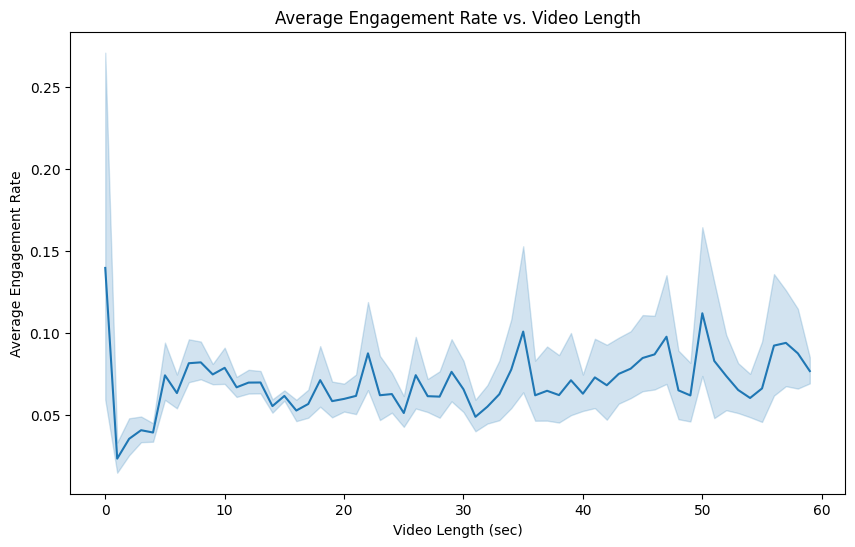

In [119]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=short_video_df, x='Video Length', y='Engagement Rate', estimator=np.mean)

plt.xlabel('Video Length (sec)')
plt.ylabel('Average Engagement Rate')
plt.title('Average Engagement Rate vs. Video Length')

plt.savefig('Average Engagement Rate vs. Video Length.png')

plt.show()

The analysis of the chart above reveals that the average engagement rate exhibits fluctuations in relation to changes in video length. Notably, there does not appear to be a linear regression between these two variables. However, it is observed that videos with durations around 35 and 50 seconds tend to receive higher engagement rates. This observation aligns with expectations, considering the prevailing trends of shorter attention spans and the preference for concise content within the 30 to 60-second range.

Generally speaking, shorter videos demonstrate a higher retention rate and tend to perform better in terms of engagement. The concise nature of these videos increases the likelihood of viewers watching them in their entirety, capturing the attention-grabbing elements. As a result, shorter videos have a greater potential to captivate and engage viewers, thereby contributing to higher engagement rates.

#### Engagement Column Correlation

In [120]:
dummy_df = pd.get_dummies(clean_df['Upload Period'], prefix='Upload', dtype='int')

clean_df = pd.concat([clean_df, dummy_df], axis=1)

clean_df.head()

,Video ID,User,Hashtags,Song Title,Video Length,Likes,Shares,Comments,Views,Followers,...,Upload Day,Upload Weekday,Upload Period,Total Engagement,Engagement Rate,Number of Hashtags,Upload_Afternoon,Upload_Evening,Upload_Midnight,Upload_Morning
0,6892428462015958273,john.cena10,"['johncena', 'love', 'tiktok', 'fyp', 'foryoup...",الصوت الأصلي,8,1984,3,18,12800,1000000,...,7,6,Afternoon,2005,0.002005,6,1,0,0,0
1,6891790235336822018,john.cena10,"['johncena', 'love', 'tiktok', 'halloween', 'q...",الصوت الأصلي,6,7372,9,51,52800,1000000,...,5,4,Evening,7432,0.007432,8,0,1,0,0
2,6891264678832475393,john.cena10,"['johncena', 'love', 'fyp', 'foryoupage']",The Time Is Now (John Cena),5,4623,11,27,37700,1000000,...,4,3,Afternoon,4661,0.004661,4,1,0,0,0
3,6891050048403049730,john.cena10,"['johncena', 'fyp', 'foryoupage', 'viral', 'co...",الصوت الأصلي,6,7931,6,24,51200,1000000,...,3,2,Evening,7961,0.007961,7,0,1,0,0
4,6890886086613126402,john.cena10,"['johncena', 'foryoupage', 'fyp', 'viral']",الصوت الأصلي,15,3229,9,14,24700,1000000,...,3,2,Afternoon,3252,0.003252,4,1,0,0,0


In [121]:
clean_df = clean_df.drop('Upload Period', axis=1)

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52844 entries, 0 to 52843
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Video ID            52844 non-null  int64  
 1   User                52844 non-null  object 
 2   Hashtags            52844 non-null  object 
 3   Song Title          52844 non-null  object 
 4   Video Length        52844 non-null  int64  
 5   Likes               52844 non-null  int64  
 6   Shares              52844 non-null  int64  
 7   Comments            52844 non-null  int64  
 8   Views               52844 non-null  int64  
 9   Followers           52844 non-null  int64  
 10  Total Likes         52844 non-null  int64  
 11  Total Videos        52844 non-null  int64  
 12  Upload Year         52844 non-null  int64  
 13  Upload Month        52844 non-null  int64  
 14  Upload Day          52844 non-null  int64  
 15  Upload Weekday      52844 non-null  int64  
 16  Tota

In [125]:
numeric_df = clean_df.copy()

numeric_df = numeric_df.drop(['User','Hashtags', 'Song Title'], axis=1)

In [126]:
X = numeric_df.drop('Engagement Rate', axis=1)
y = numeric_df['Engagement Rate'].copy()

In [127]:
X.corr()

,Video ID,Video Length,Likes,Shares,Comments,Views,Followers,Total Likes,Total Videos,Upload Year,Upload Month,Upload Day,Upload Weekday,Total Engagement,Number of Hashtags,Upload_Afternoon,Upload_Evening,Upload_Midnight,Upload_Morning
Video ID,1.000000,0.011318,-0.020152,-0.008503,-0.026243,-0.029598,0.015180,0.029676,0.043540,0.799821,0.140958,-0.011013,-0.006249,-0.020355,0.008497,0.013241,0.012333,-0.008835,-0.023324
Video Length,0.011318,1.000000,-0.006279,0.014637,-0.010003,-0.021415,-0.031391,-0.041222,-0.027166,0.002599,-0.009451,-0.001117,-0.013781,-0.006036,0.099309,-0.003942,0.011271,0.005133,-0.016370
Likes,-0.020152,-0.006279,1.000000,0.630997,0.576278,0.835602,0.471758,0.351872,-0.018079,-0.066243,-0.058718,0.004078,0.006021,0.999693,-0.145426,-0.054211,0.076538,0.031965,-0.073186
Shares,-0.008503,0.014637,0.630997,1.000000,0.504672,0.585761,0.187448,0.131392,-0.026770,-0.060076,-0.069233,0.007292,0.003423,0.645536,-0.029161,-0.018048,0.014046,0.016584,-0.015628
Comments,-0.026243,-0.010003,0.576278,0.504672,1.000000,0.580293,0.270723,0.243867,-0.004867,-0.042049,-0.012587,-0.007799,-0.002159,0.592233,-0.080779,-0.039215,0.040516,0.026012,-0.036001
Views,-0.029598,-0.021415,0.835602,0.585761,0.580293,1.000000,0.364658,0.237333,-0.030040,-0.083793,-0.112864,0.008449,0.000164,0.838476,-0.092890,-0.020415,0.034960,0.018117,-0.042990
Followers,0.015180,-0.031391,0.471758,0.187448,0.270723,0.364658,1.000000,0.818261,0.384827,-0.021467,0.042224,0.026807,0.001361,0.469408,-0.226816,-0.035789,0.080092,-0.012351,-0.049945
Total Likes,0.029676,-0.041222,0.351872,0.131392,0.243867,0.237333,0.818261,1.000000,0.525748,0.033275,0.108178,0.013877,0.004144,0.350790,-0.190359,-0.048281,0.092435,-0.009024,-0.054898
Total Videos,0.043540,-0.027166,-0.018079,-0.026770,-0.004867,-0.030040,0.384827,0.525748,1.000000,0.067816,0.105049,0.015820,0.014397,-0.018267,-0.100858,0.011052,-0.003951,-0.041069,0.039036
Upload Year,0.799821,0.002599,-0.066243,-0.060076,-0.042049,-0.083793,-0.021467,0.033275,0.067816,1.000000,0.021569,-0.010223,0.000408,-0.066662,0.035704,0.017665,0.000780,-0.010381,-0.011332


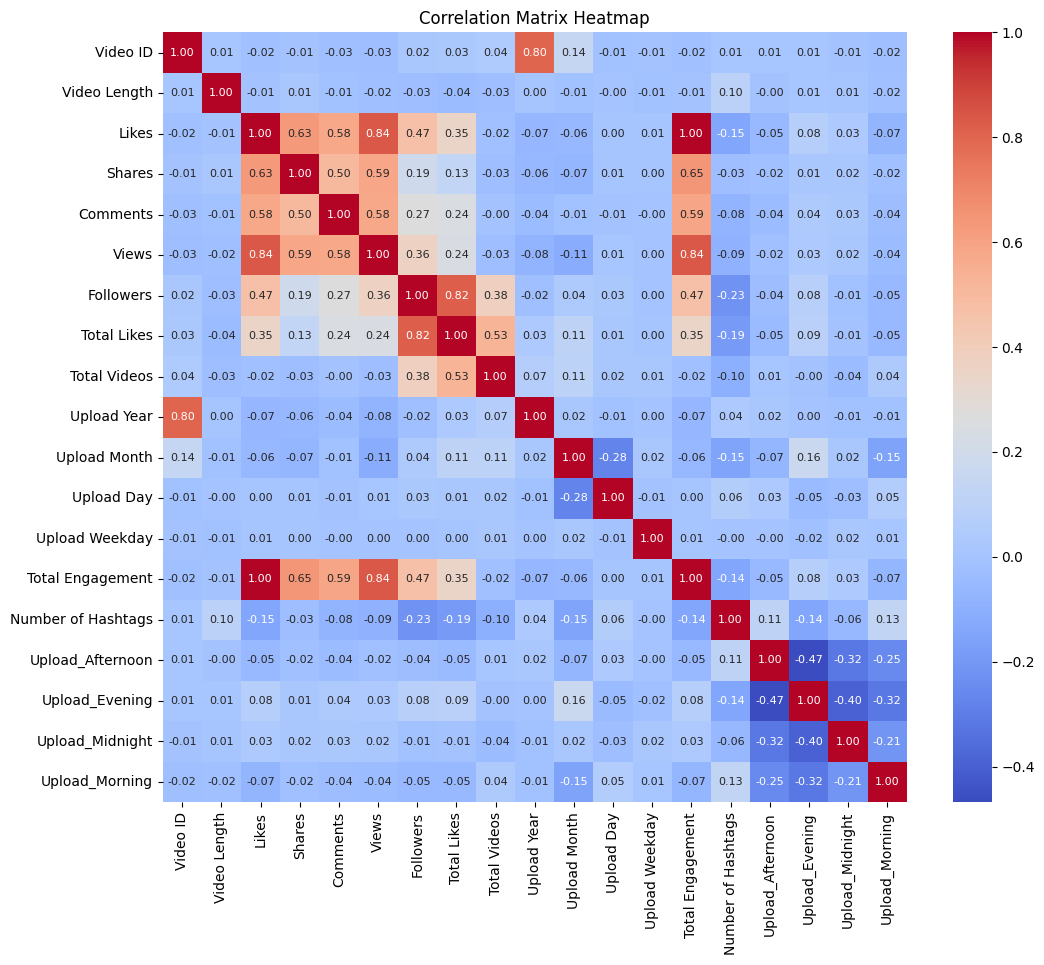

In [144]:
plt.figure(figsize=(12,10))

sns.heatmap(X.corr(), annot=True, fmt=".2f", annot_kws={"size": 8}, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')

plt.show()

Based on the analysis of the heatmap, several key observations can be made:

1. High correlations: The heatmap reveals strong positive correlations between the `Views` feature and the `Likes`, `Shares`, and `Comments` features. This indicates that videos with higher views tend to have a higher likelihood of receiving more likes, shares, and comments.

2. Relationship between Followers and Total Likes: The heatmap highlights a significant correlation between the `Followers` and `Total Likes` features. This suggests that users with a larger follower base tend to accumulate a higher number of likes.

3. Relationship between Followers and Views/Likes/Shares/Comments: The heatmap reveals that the relationship between `Followers` and `Views`, `Likes`, `Shares`, and `Comments` is not as strong as initially expected. This implies that while follower count may influence engagement levels, it is not the sole determining factor. Other variables or factors likely contribute to the engagement metrics.

4. Multicollinearity of Upload Period: The heatmap shows evidence of multicollinearity among the different upload periods. This suggests that the upload periods are highly correlated with each other, potentially sharing similar characteristics or trends.

5. Multicollinearity of Upload Day and Upload Month: Similarly, the heatmap indicates multicollinearity between the upload day and upload month variables. This implies that these two temporal variables share common patterns or trends, and their impact on the dependent variables may be intertwined.